<a href="https://colab.research.google.com/github/GabrielRamirezs/Metodos1_KarenQuevedo_GabrielRamirez/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [7]:
#8
x_0, x_1, x_2 = sym.symbols('x_0 x_1 x_2')
f_x0, f_x1, f_x2 = sym.symbols('f_x0 f_x1 f_x2')
X = np.array([x_0, x_1, x_2])
Y = np.array([f_x0, f_x1, f_x2])
x= sym.Symbol('x',real=True)
def Lagrange(x,X,i):
  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L
Lagrange(x,X,0)
Lagrange(x,X,1)
Lagrange(x,X,2)
def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly
poly = Interpolate(x,X,Y)
poly = poly.expand()
poly

f_x0*x**2/(x_0**2 - x_0*x_1 - x_0*x_2 + x_1*x_2) - f_x0*x*x_1/(x_0**2 - x_0*x_1 - x_0*x_2 + x_1*x_2) - f_x0*x*x_2/(x_0**2 - x_0*x_1 - x_0*x_2 + x_1*x_2) + f_x0*x_1*x_2/(x_0**2 - x_0*x_1 - x_0*x_2 + x_1*x_2) + f_x1*x**2/(-x_0*x_1 + x_0*x_2 + x_1**2 - x_1*x_2) - f_x1*x*x_0/(-x_0*x_1 + x_0*x_2 + x_1**2 - x_1*x_2) - f_x1*x*x_2/(-x_0*x_1 + x_0*x_2 + x_1**2 - x_1*x_2) + f_x1*x_0*x_2/(-x_0*x_1 + x_0*x_2 + x_1**2 - x_1*x_2) + f_x2*x**2/(x_0*x_1 - x_0*x_2 - x_1*x_2 + x_2**2) - f_x2*x*x_0/(x_0*x_1 - x_0*x_2 - x_1*x_2 + x_2**2) - f_x2*x*x_1/(x_0*x_1 - x_0*x_2 - x_1*x_2 + x_2**2) + f_x2*x_0*x_1/(x_0*x_1 - x_0*x_2 - x_1*x_2 + x_2**2)

In [8]:
poly_prime = sym.diff(poly, x)
poly_prime

2*f_x0*x/(x_0**2 - x_0*x_1 - x_0*x_2 + x_1*x_2) - f_x0*x_1/(x_0**2 - x_0*x_1 - x_0*x_2 + x_1*x_2) - f_x0*x_2/(x_0**2 - x_0*x_1 - x_0*x_2 + x_1*x_2) + 2*f_x1*x/(-x_0*x_1 + x_0*x_2 + x_1**2 - x_1*x_2) - f_x1*x_0/(-x_0*x_1 + x_0*x_2 + x_1**2 - x_1*x_2) - f_x1*x_2/(-x_0*x_1 + x_0*x_2 + x_1**2 - x_1*x_2) + 2*f_x2*x/(x_0*x_1 - x_0*x_2 - x_1*x_2 + x_2**2) - f_x2*x_0/(x_0*x_1 - x_0*x_2 - x_1*x_2 + x_2**2) - f_x2*x_1/(x_0*x_1 - x_0*x_2 - x_1*x_2 + x_2**2)

In [9]:
derivada_x0 = poly_prime.subs(x, x_0)
derivada_x0

2*f_x0*x_0/(x_0**2 - x_0*x_1 - x_0*x_2 + x_1*x_2) - f_x0*x_1/(x_0**2 - x_0*x_1 - x_0*x_2 + x_1*x_2) - f_x0*x_2/(x_0**2 - x_0*x_1 - x_0*x_2 + x_1*x_2) + f_x1*x_0/(-x_0*x_1 + x_0*x_2 + x_1**2 - x_1*x_2) - f_x1*x_2/(-x_0*x_1 + x_0*x_2 + x_1**2 - x_1*x_2) + f_x2*x_0/(x_0*x_1 - x_0*x_2 - x_1*x_2 + x_2**2) - f_x2*x_1/(x_0*x_1 - x_0*x_2 - x_1*x_2 + x_2**2)

In [ ]:
def finite_difference_derivative_formula(poly, x, h):
    f_x = poly.subs(x, x)
    f_x_h = poly.subs(x, x + h)
    f_x_2h = poly.subs(x, x + 2 * h)
    derivative = (1 / (2 * h)) * (-3 * f_x + 4 * f_x_h - f_x_2h)
    return derivative

h = sym.Symbol('h', real=True)
derivative_formula = finite_difference_derivative_formula(poly, x, h)
derivative_formula

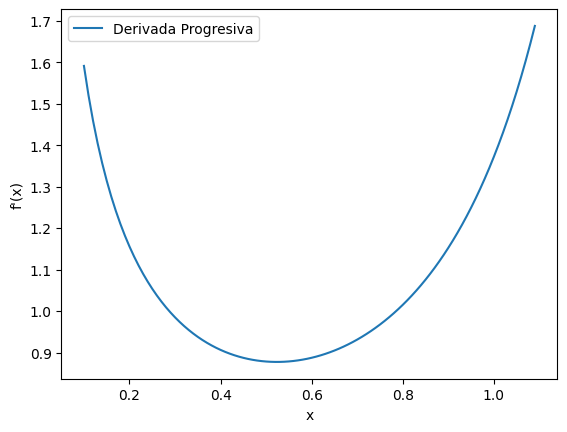

In [10]:
#c
def f(x):
    return np.sqrt(np.tan(x))

def derivada_progresiva(x, h):
    return (1 / (2 * h)) * (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h))

x_vals = np.arange(0.1, 1.1, 0.01)
h = 0.01
derivadas = [derivada_progresiva(x, h) for x in x_vals]

plt.plot(x_vals, derivadas, label="Derivada Progresiva")
plt.xlabel('x')
plt.ylabel("f'(x)")

plt.legend()
plt.show()

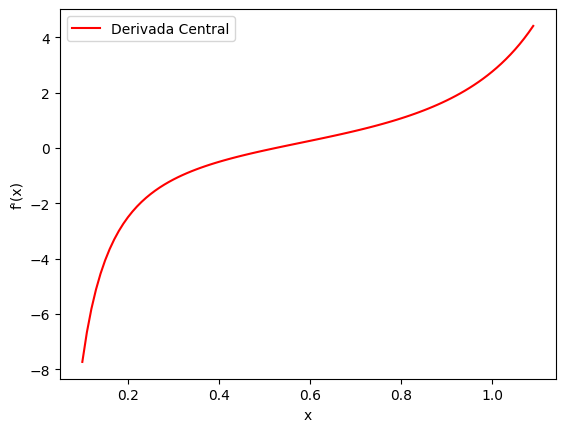

In [11]:
#d
def f(x):
    return np.sqrt(np.tan(x))

def derivada_central(x, h):
    return (1 / (h**2)) * (f(x+h)-2*f(x)+f(x-h))

x_vals = np.arange(0.1, 1.1, 0.01)
h = 0.01
derivadas = [derivada_central(x, h) for x in x_vals]

plt.plot(x_vals, derivadas, label="Derivada Central",color="r")
plt.xlabel('x')
plt.ylabel("f'(x)")

plt.legend()
plt.show()

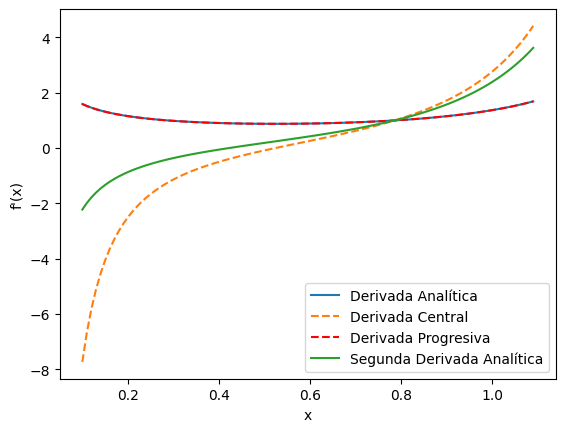

In [12]:
#e
def f_primera_analitica(x):
    return (1 / (2 * np.sqrt(np.tan(x)))) * (1 / np.cos(x))**2
#Es lo mismo que la derivada progresiva
def segunda_derivada_analitica(x):
    sec_x = 1 / np.cos(x)
    tan_x = np.tan(x)
    return (4 * sec_x**2 * tan_x * np.sqrt(tan_x) - sec_x**4) / (4 * tan_x)

x_vals = np.arange(0.1, 1.1, 0.01)
h = 0.01
derivadas_analiticas = f_primera_analitica(x_vals)
derivadas_centrales = [derivada_central(x, h) for x in x_vals]
derivadas_progresivas = [derivada_progresiva(x, h) for x in x_vals]
segunda_derivada_analiticas = segunda_derivada_analitica(x_vals)

plt.plot(x_vals, derivadas_analiticas, label="Derivada Analítica")
plt.plot(x_vals, derivadas_centrales, '--', label="Derivada Central ")
plt.plot(x_vals, derivadas_progresivas, '--', label="Derivada Progresiva ",color="r")
plt.plot(x_vals, segunda_derivada_analiticas, label="Segunda Derivada Analítica")
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.legend()
plt.show()

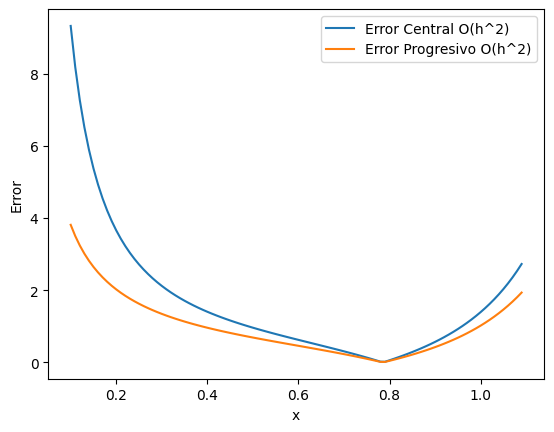

In [13]:
errores_centrales = np.abs(derivadas_analiticas - derivadas_centrales)
errores_progresivos = np.abs(segunda_derivada_analiticas - derivadas_progresivas)

plt.plot(x_vals, errores_centrales, label="Error Central O(h^2)")
plt.plot(x_vals, errores_progresivos, label="Error Progresivo O(h^2)")
plt.xlabel('x')
plt.ylabel("Error")
plt.legend()
plt.show()

In [6]:
#Interpolacion de Langrage
#2
import numpy as np

def lagrange(x, x_, i):
    L_i = 1
    n = len(x_)
    for m in range(n):
        if m != i:
            L_i *= (x - x_[m]) / (x_[i] - x_[m])
    return L_i

x_ = np.array([0, 1, 2, 3])

n = len(x_)
for i in range(n):
    for j in range(n):
        L_ij = lagrange(x_[j], x_, i)
        print(f'L_{i}({x_[j]}) = {L_ij:.1f},experado= {1 if i == j else 0}')


L_0(0) = 1.0,experado= 1
L_0(1) = -0.0,experado= 0
L_0(2) = 0.0,experado= 0
L_0(3) = -0.0,experado= 0
L_1(0) = 0.0,experado= 0
L_1(1) = 1.0,experado= 1
L_1(2) = -0.0,experado= 0
L_1(3) = 0.0,experado= 0
L_2(0) = -0.0,experado= 0
L_2(1) = 0.0,experado= 0
L_2(2) = 1.0,experado= 1
L_2(3) = -0.0,experado= 0
L_3(0) = 0.0,experado= 0
L_3(1) = -0.0,experado= 0
L_3(2) = 0.0,experado= 0
L_3(3) = 1.0,experado= 1


In [4]:
#3
x = np.array([100, 121, 144])
y = np.sqrt(x)
x_ = 114
def lagrange_interpolacion(x, y, x_eval):
    n = len(x)
    resultado = 0
    for i in range(n):
        termino = y[i]
        for j in range(n):
            if j != i:
                termino *= (x_eval - x[j]) / (x[i] - x[j])
        resultado += termino
    return resultado
y_lagrange = lagrange_interpolacion(x, y, x_)
y_real = np.sqrt(x_)
error = np.abs(y_real - y_lagrange)
y_lagrange, error

(10.675889328063242, 0.0011889239680691333)

In [ ]:
#4
import pandas as pd
import sympy as sym
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv"
data = pd.read_csv(url)

x = data['X'].values
y = data['Y'].values
coef = np.polyfit(x, y, 2)
a, b, c = coef
g=9.8

theta = np.arctan(b)
V0 = np.sqrt(-g / (2 * a * np.cos(theta)**2))
theta_radianes = np.degrees(theta)
print(V0)
print(theta_radianes)


9.999999999999998
20.00000000000001
